<a href="https://colab.research.google.com/github/samuel-engel/house_prices_team_challenge/blob/master/Team_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, we need to grab the Git from GitHub. This will then be used to retrieve all our data.

In [0]:
! git clone https://github.com/samuel-engel/house_prices_team_challenge.git

Cloning into 'house_prices_team_challenge'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


Next, our Python script imports the modules we intend to use. These include:

*   numpy, a numerical and array module
*   pandas, a data analysis module which includes functions for loading CSV files
*   matplotlib.pyplot, for plotting and rendering graphs
*   seaborn, a plotting library that is built on top of matplotlib for ease of use
*   scikit-learn (imports as sklearn), a machine learning library to use the data generated and return the result







In [0]:
# math and data science
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from scipy.stats import norm
from scipy.stats import norm
import xgboost

In [0]:
from subprocess import check_output
print(check_output(["ls", "house_prices_team_challenge/house-prices-data"]).decode("utf8"))

data_description.txt
sample_submission.csv
test.csv
train.csv



Here, we load in the training data for the house prices.

In [0]:
# default path for accesing the data
path = 'house_prices_team_challenge/house-prices-data/'


In [0]:
train_data = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
test.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [0]:
#the following cells were inspired by https://colab.research.google.com/drive/1spoO3nGCzhaE9IdAjHlwDZ8ZtB-G6VBP#scrollTo=EO-VdPBbOmtw
# check for duplicate IDs
unique_ids = len(set(train_data.Id))
total_ids = train_data.shape[0]
duplicate_ids = total_ids - unique_ids
print("Duplicate IDs: " + str(duplicate_ids))


Duplicate IDs: 0


In [0]:
# save id column
train_data_id = train_data['Id']
# temporarily drop the id column 
train_data.drop(['Id'], axis = 1, inplace = True)

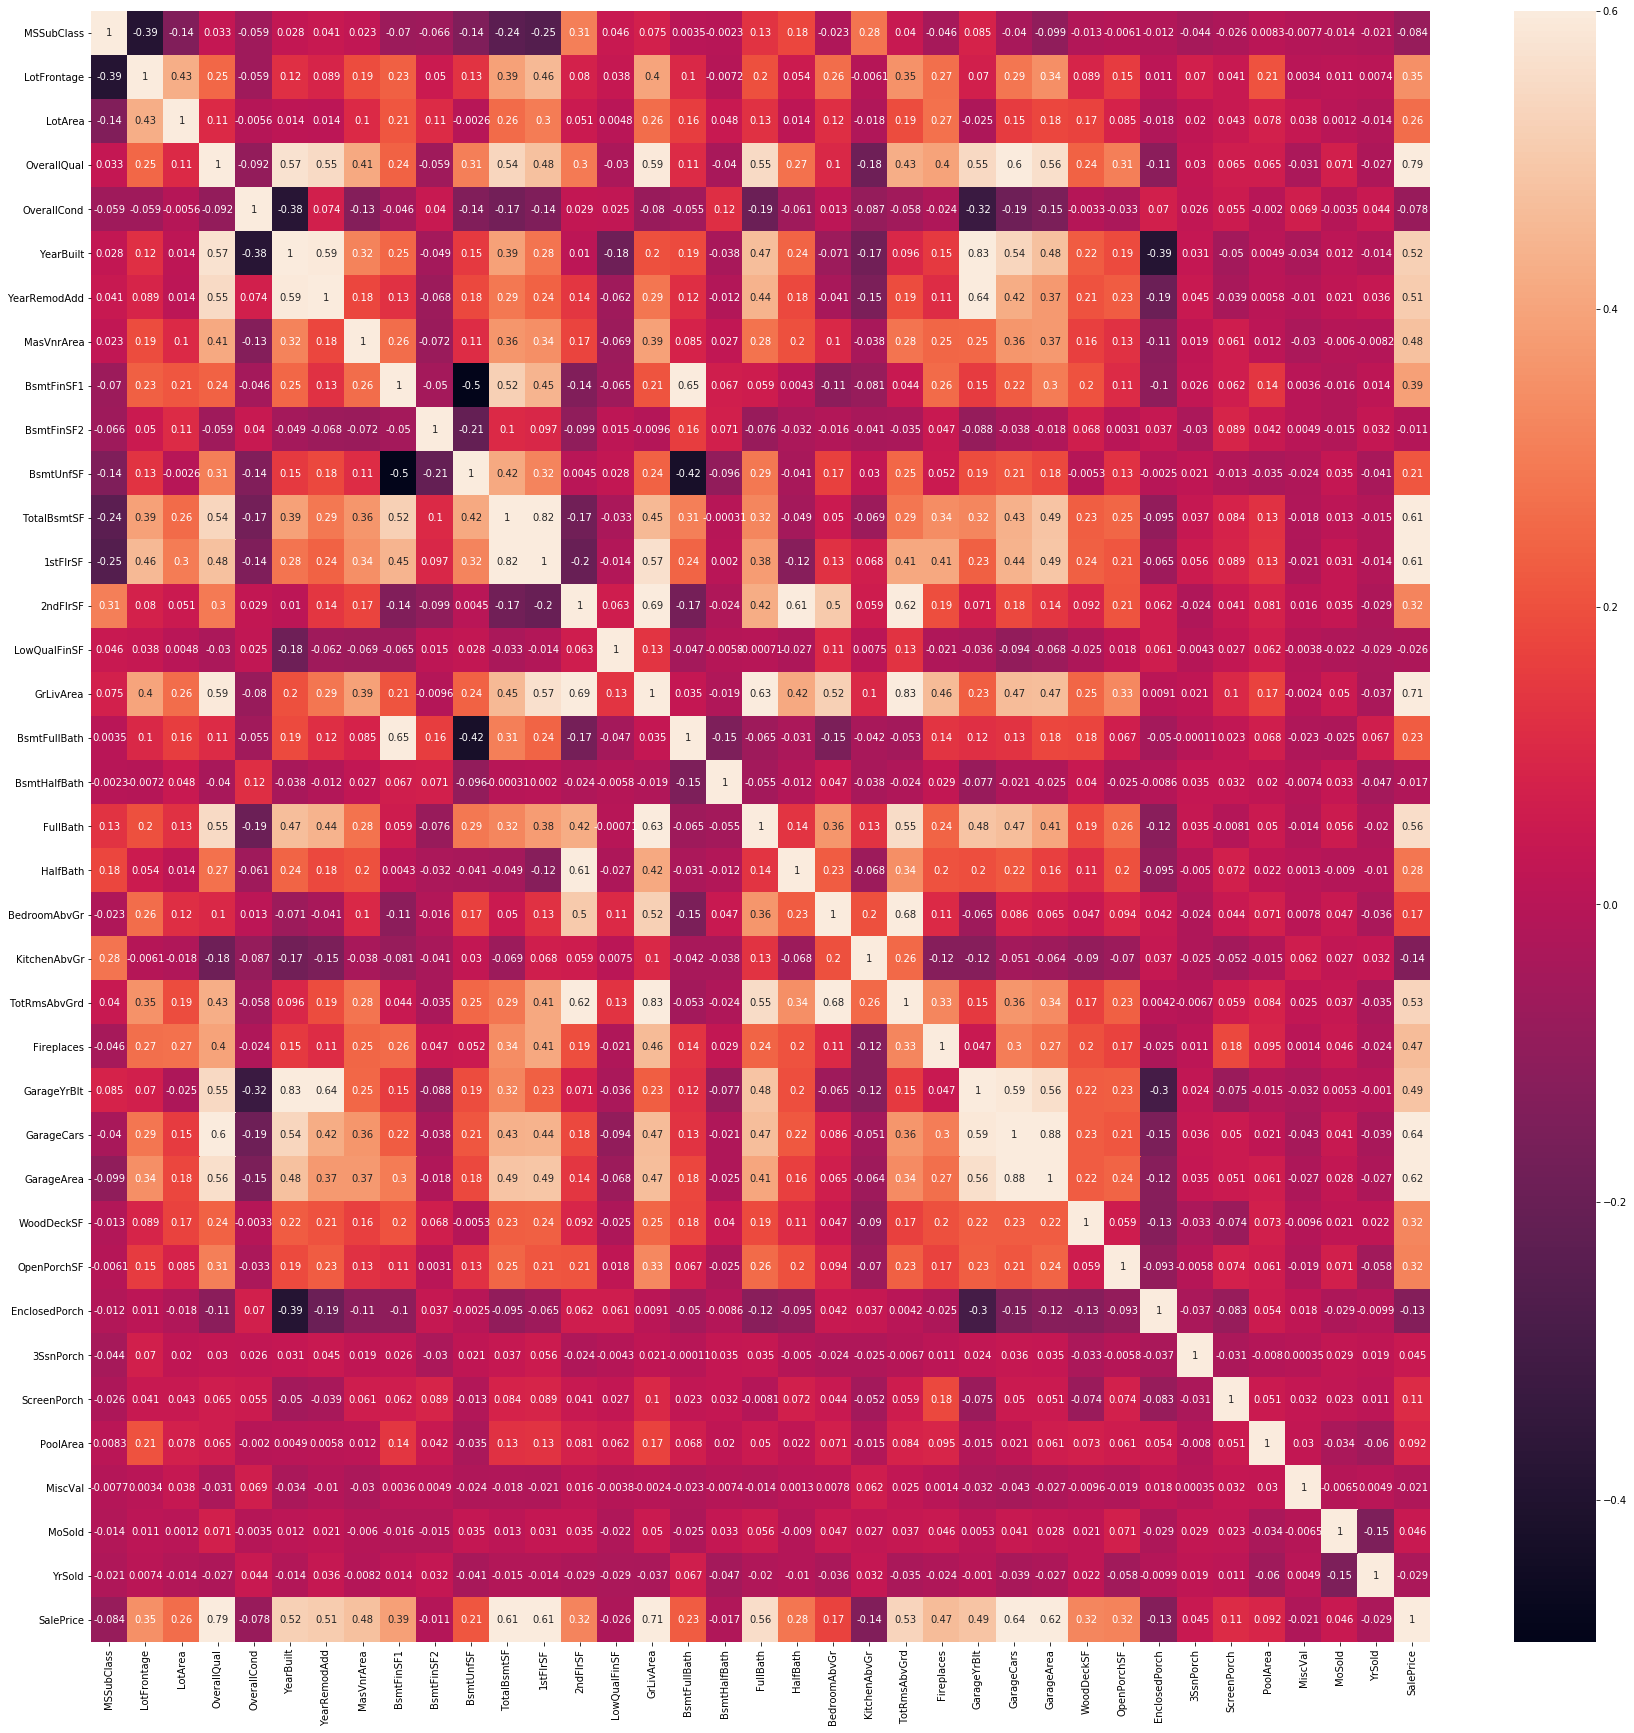

In [0]:
correlation_matrix = train_data.corr()
plt.subplots(figsize=(30, 30))
# plt.margins(y = 0.8)
sns.heatmap(correlation_matrix, vmax=0.6, annot=True);

Taking the above data into account, we grab any categories that have a higher correlation with SalePrice than 0.5 and map them. The next task would be to look for values that have a high correlation with each other, as they are likely to affect SalePrice equally (such as 1stFlSF and TotalBsmtSF). We only need to take into account one of these, as they are likely to effectively be the same thing.

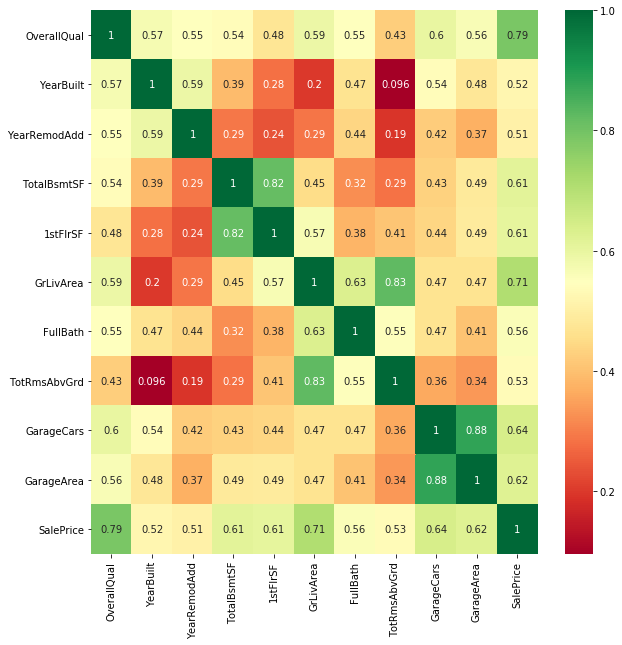

In [0]:
correlation_matrix = train_data.corr()
top_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_features].corr(), annot=True, cmap="RdYlGn")

This code shows the most correlated features 

In [0]:
k = 10
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


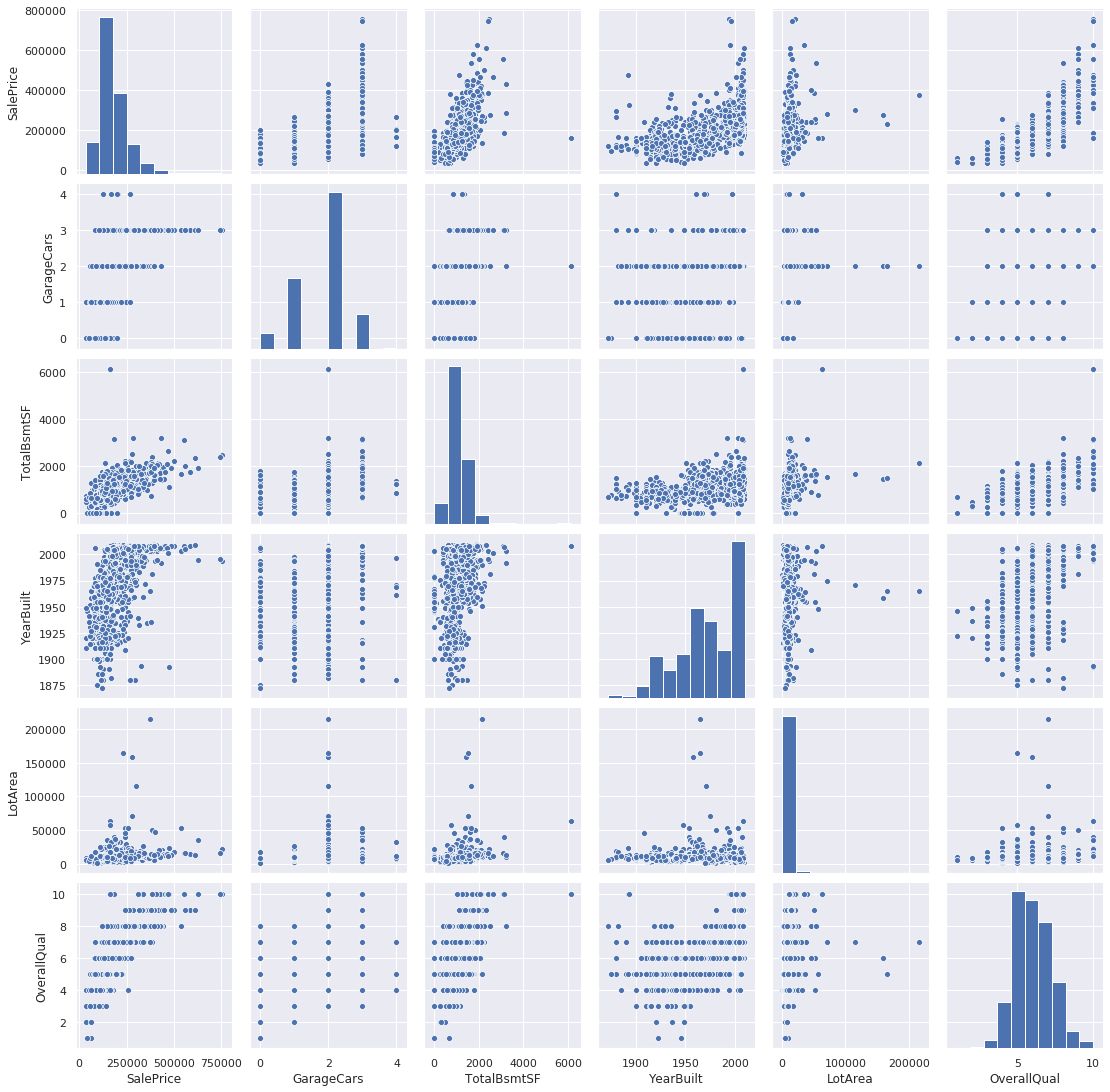

In [0]:
sns.set()
value = ['SalePrice', 'GarageCars','TotalBsmtSF', 'YearBuilt', 'LotArea', 'OverallQual']
sns.pairplot(train_data[value], height = 2.5)
plt.show();

Text(0.5, 0, 'House Index (?)')

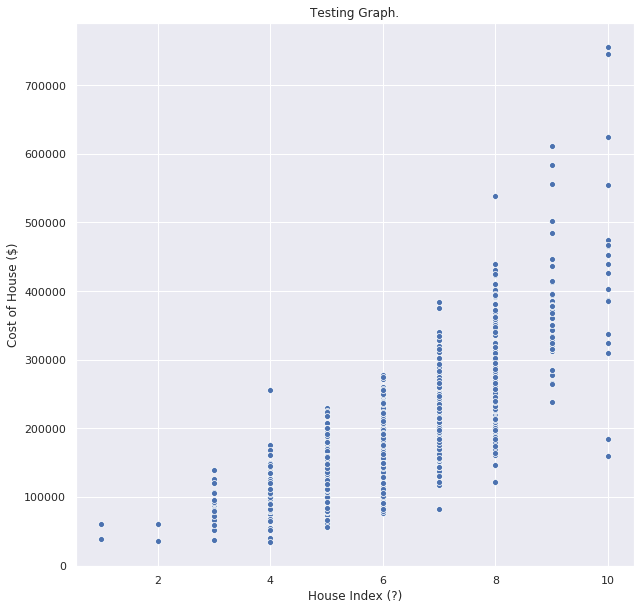

In [0]:
trainhead_data = train_data.head()

plt.figure(figsize=(10,10))
plt.title("Testing Graph.")
sns.scatterplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.ylabel("Cost of House ($)")
plt.xlabel("House Index (?)")


Analazing some data by default and applying the logarthim function

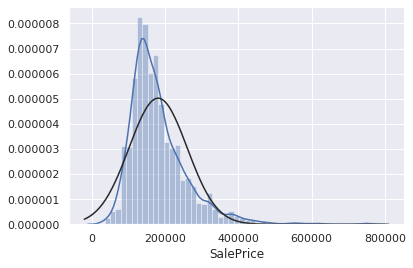

In [0]:
sns.distplot(train_data["SalePrice"],fit=norm);


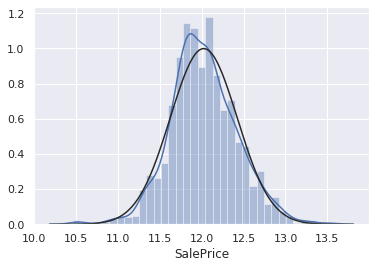

In [0]:
target=np.log(train_data["SalePrice"]);
sns.distplot(target,fit=norm);

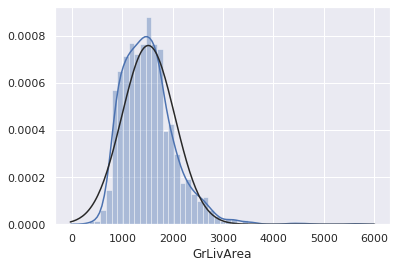

In [0]:
sns.distplot(train_data["GrLivArea"],fit=norm);


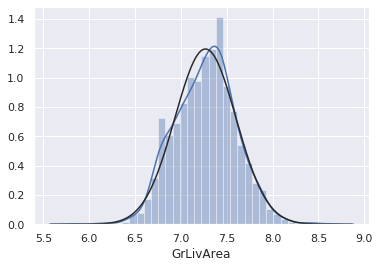

In [0]:
target=np.log(train_data["GrLivArea"]);
sns.distplot(target,fit=norm);

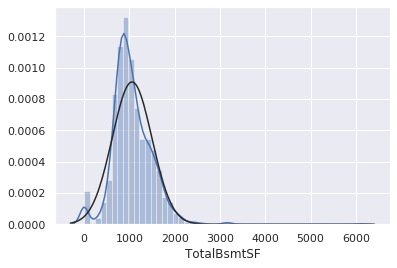

In [0]:
sns.distplot(train_data["TotalBsmtSF"],fit=norm);


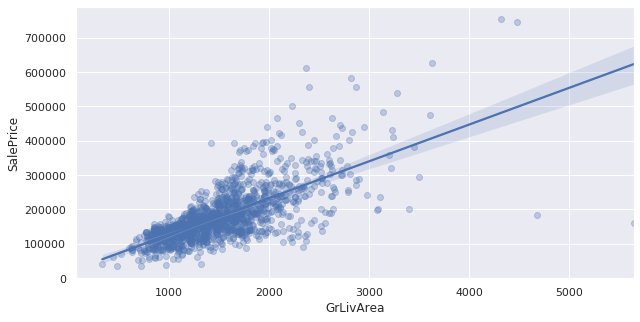

In [0]:
plt.figure(figsize=(10,5))
sns.regplot(train_data.GrLivArea, train_data.SalePrice, scatter_kws={"alpha":0.3})
plt.show()

In [0]:
train_data.drop(train_data[(train_data['GrLivArea']>4000) 
                         & (train_data['SalePrice']<300000)].index , inplace=True)

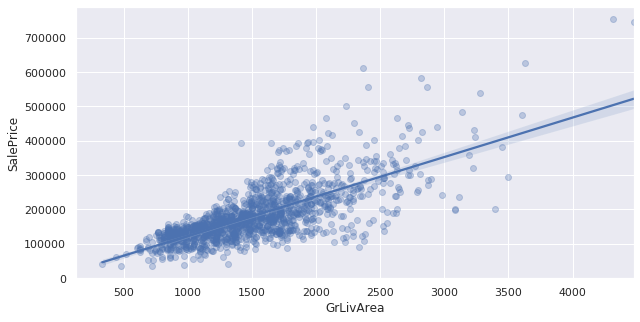

In [0]:
plt.figure(figsize=(10,5))
sns.regplot(train_data.GrLivArea, train_data.SalePrice, scatter_kws={"alpha":0.3})
plt.show()

I've created a table showing the variables that are kind of useless so we need to delete the variables that could affect the price of the house

In [0]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head(20)


,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


I've deleted all the data from above because it is irelevant and it contains some missing data, so it won't bother us

In [0]:
train_data=train_data.drop((data[data['Total'] > 1]).index,1)
train_data=train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max()


0

This is the result after the deletion


In [0]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head(20)

,Total,Percent
SalePrice,0,0.0
OverallCond,0,0.0
TotalBsmtSF,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0


In [0]:
print("")

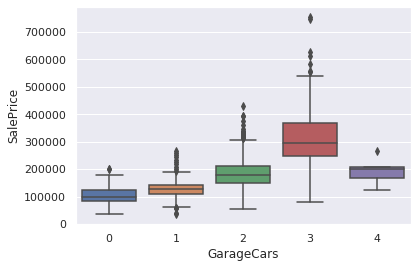

In [0]:
x=train_data['GarageCars']
y=train_data['SalePrice']
sns.boxplot(x,y)

Deleting unecesry data regarding Sale Price and Size of the Garage Car cpacity variables

In [0]:
train_data=train_data.drop(train_data[(train_data['GarageCars']>3) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

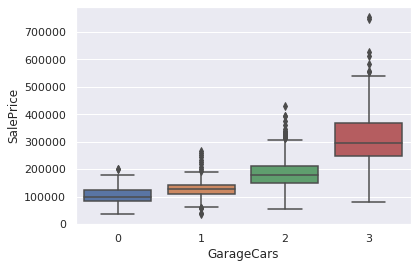

In [0]:
x=train_data['GarageCars']
y=train_data['SalePrice']
sns.boxplot(x, y)

Trying to remove the bottom dots


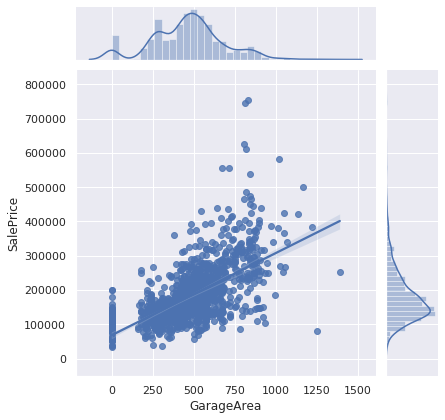

In [0]:
x=train_data['GarageArea']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

Deeleting the unecesry data regarding Garage Area and Sale Price

In [0]:
train_data=train_data.drop(train_data[(train_data['GarageArea']>1000) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

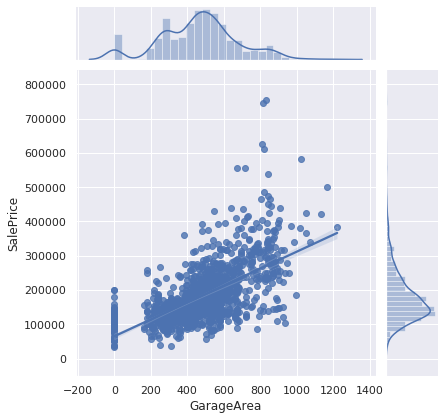

In [0]:
x=train_data['GarageArea']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

This look ok-ish comparing Sale Price with Total Square feet of basement

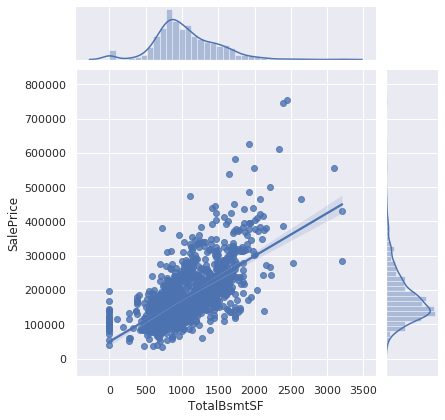

In [0]:
x=train_data['TotalBsmtSF']
y=train_data['SalePrice']
sns.jointplot(x, y, kind='reg')

Analazing the Sale Price of Houses for every year 

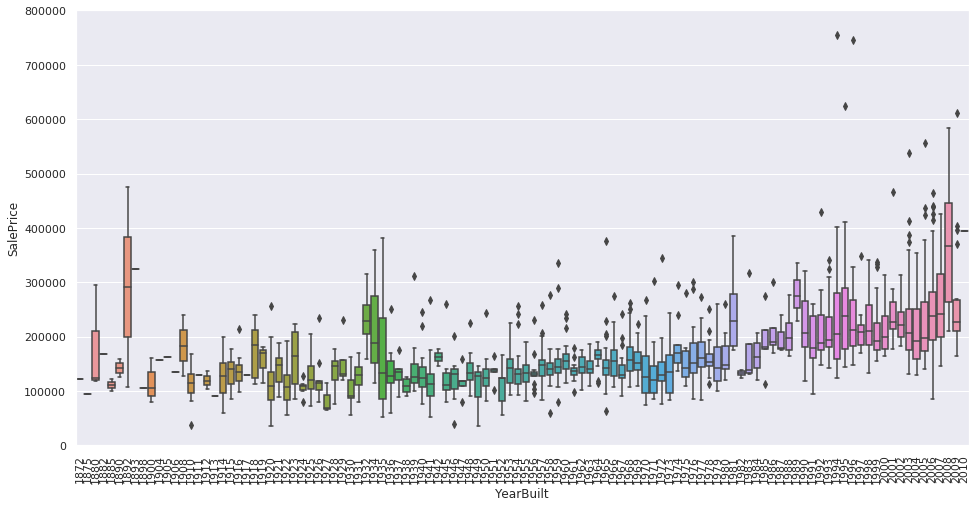

In [0]:
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [0]:
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


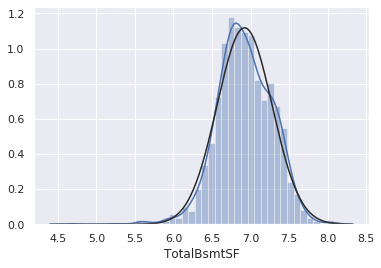

<Figure size 432x288 with 0 Axes>

In [0]:
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()


In [0]:
train_data.shape

(1447, 63)

In [0]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
HasBsmt          0
Length: 63, dtype: int64

Checking the values of the features

In [0]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 63 columns):
MSSubClass       1447 non-null int64
MSZoning         1447 non-null object
LotArea          1447 non-null int64
Street           1447 non-null object
LotShape         1447 non-null object
LandContour      1447 non-null object
Utilities        1447 non-null object
LotConfig        1447 non-null object
LandSlope        1447 non-null object
Neighborhood     1447 non-null object
Condition1       1447 non-null object
Condition2       1447 non-null object
BldgType         1447 non-null object
HouseStyle       1447 non-null object
OverallQual      1447 non-null int64
OverallCond      1447 non-null int64
YearBuilt        1447 non-null int64
YearRemodAdd     1447 non-null int64
RoofStyle        1447 non-null object
RoofMatl         1447 non-null object
Exterior1st      1447 non-null object
Exterior2nd      1447 non-null object
ExterQual        1447 non-null object
ExterCond        1447 non

In [0]:
train_data.shape

(1447, 63)

Defining cross_val_score function

In [0]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [0]:
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [0]:
test = test.dropna(axis='columns')

In [0]:
test = test.drop(['Id'],axis='columns')

In [0]:
yes = test.isnull().sum()
yes = yes[yes!=0].dropna()
print(yes)

Series([], dtype: int64)


In [0]:
test.shape

(1459, 75)

In [0]:
copy = test.select_dtypes(include=['object']).copy()

In [0]:
copy.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [0]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
MSZoning         1459 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     14

In [0]:
y_train = train_data.SalePriceLog.values.reshape((1370,1))
x_train = train_data.drop(['SalePrice','SalePriceLog'], axis=1).values.reshape((1370, 81))
x_test = test.values.reshape((1459,81))

AttributeError: ignored

In [0]:
import xgboost
xgbr = xgboost.XGBRegressor()
xgbr.fit(notSP, sPrice)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
prediction = xgbr.predict(test)



In [0]:
prediction_df = pd.DataFrame(prediction)
sample_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')
final_data = pd.concat([sample_df['Id'],prediction_df],axis=1)
final_data.columns = ['Id', 'Saleprice']
final_data.to_csv('submission1.csv',index=False)